# Explanation of Modulation Instability

The Nonlinear Schrodinger Equation is given by:

$\frac{\partial A}{\partial z}=-i \frac{\beta_2}{2} \frac{\partial^2 A}{\partial T^2}+i\gamma|A|^2A$.

If $\beta_2<0$, meaning that we have anormalous dispersion where blue light propagates faster than red light, and $\gamma>0$, we can achieve "solitons"; optical pulses, which retain their shape as they propagate. 

But what happens if we add a tiny bit of noise? Will we still get nice, clean solitons? By adding noise, we essentially introduce additional light with a range of frequencies. These will modulate the refractive index of the glass, which in turn modulates the phase of the pulse sinusoidally, which transfers power away from the carrier frequency and into adjacent ones above and below. This is essentially the same effect as Four-Wave Mixing demonstrated here: 

https://youtu.be/gsa9hrCbnqI 
 
Crucially, the presence of anormalous dispersion means that particular frequency components will gain more power from the carrier than others. We say that they are "phase matched". This causes the output signal to contain spikes with a temporal spacing equal to the reciprocal of this frequency component. 

For an analytical derication, please see this excellent explanation by

Marcus R.A. Newman:
https://prefetch.eu/know/concept/modulational-instability/

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import custom functions for running SSFM

In [2]:
from ssfm_functions import *


## Initialize timebase

In [3]:
N  = 2**14 #Number of points
dt = 0.1e-12 #Time resolution [s] 

timeFreq_test=timeFreq_class(N,dt)

 ### timeFreq Configuration Parameters ###
  Number of points = 16384
  Start time, tmin = -819.200ps
  Stop time, tmax = 819.200ps
  Time resolution, dt = 0.100ps
  
  Start frequency= -5.000THz
  Stop frequency = 4.999THz
  Frequency resolution= 610.314MHz
   


## Initialize fiber with anormalous dispersion ($\beta_2<0$)

In [4]:


#Define fiber parameters
Length          = 500      #Fiber length in m

gamma           = 40e-3     #Nonlinearity parameter in 1/W/m 
beta2           = -100e3    #Dispersion in fs^2/m (units typically used when referring to beta2) 
beta2          *= (1e-30)  #Convert fs^2 to s^2 so everything is in SI units
alpha_dB_per_m  = 0.0e-3   #Power attenuation coeff in decibel per m. Usual value at 1550nm is 0.2 dB/km

#Note:  beta2>0 is normal dispersion with red light pulling ahead, 
#       causing a negative leading chirp
#       
#       beta2<0 is anormalous dispersion with blue light pulling ahead, 
#       causing a positive leading chirp.


#  Initialize class
fiber=Fiber_class(Length, gamma, beta2, alpha_dB_per_m)

## Initialize "clean" Gaussian pulse and noisy Gaussian pulse

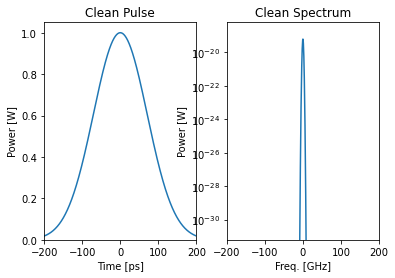

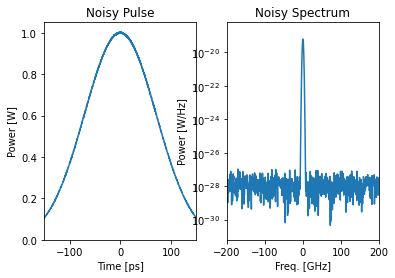

MI frequency = 142.35250868343542 GHz 


In [5]:
#Initialize Gaussian pulse with no noise


cleanAmplitude = 1                    #Amplitude in units of sqrt(W)
cleanDuration  =1000*timeFreq_test.time_step    #Pulse 1/e^2 duration [s]
cleanOffset    = 0                             #Time offset
cleanChirp = 0                                 #Chirp factor
cleanCarrierFreq=0                             #Freq. offset
cleanPulseType='gaussian'                      #'Gaussian', 'square', 'sech'
cleanOrder = 1                                 #Order of Gaussian pulse
cleanNoiseAmplitude = 0.0                      #Added ASE noise amplitude


cleanInputSignal = input_signal_class(timeFreq_test, 
                                     cleanAmplitude ,
                                     cleanDuration,
                                     cleanOffset,
                                     cleanChirp,
                                     cleanCarrierFreq,
                                     cleanPulseType,
                                     cleanOrder,
                                     cleanNoiseAmplitude)



#Initialize Gaussian pulse with ASE noise


testAmplitude = cleanAmplitude                   #Amplitude in units of sqrt(W)
testDuration  =cleanDuration    #Pulse 1/e^2 duration [s]
testOffset    = cleanOffset                             #Time offset
testChirp = cleanChirp                                 #Chirp factor
testCarrierFreq=cleanCarrierFreq                             #Freq. offset
testPulseType=cleanPulseType                     #'Gaussian', 'square', 'sech'
testOrder = cleanOrder                                 #Order of Gaussian pulse
testNoiseAmplitude = cleanAmplitude* 1e-3                     #Added ASE noise amplitude


testInputSignal = input_signal_class(timeFreq_test, 
                                     testAmplitude ,
                                     testDuration,
                                     testOffset,
                                     testChirp,
                                     testCarrierFreq,
                                     testPulseType,
                                     testOrder,
                                     testNoiseAmplitude)


fig,ax=plt.subplots(1,2)
ax[0].set_title("Clean Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,getPower(cleanInputSignal.amplitude),'C0')
ax[0].set_xlim(-2*testInputSignal.duration*1e12,2*testInputSignal.duration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Clean Spectrum")
ax[1].plot(cleanInputSignal.timeFreq.f/1e9,getPower(cleanInputSignal.spectrum),'C0')
ax[1].set_xlim(-20*1/testInputSignal.duration/1e9,20*1/testInputSignal.duration/1e9)
ax[1].set_ylim(np.max(getPower(testInputSignal.spectrum))*1e-12,np.max(getPower(testInputSignal.spectrum))*10)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("Power [W]")
plt.show()

fig,ax=plt.subplots(1,2)
ax[0].set_title("Noisy Pulse")
ax[0].plot(cleanInputSignal.timeFreq.t*1e12,getPower(testInputSignal.amplitude),'C0')
ax[0].set_xlim(-1.5*testInputSignal.duration*1e12,1.5*testInputSignal.duration*1e12)
ax[0].set_ylim(0,cleanAmplitude**2*1.05)
ax[0].set_xlabel("Time [ps]")
ax[0].set_ylabel("Power [W]")

ax[1].set_title("Noisy Spectrum")
ax[1].plot(cleanInputSignal.timeFreq.f/1e9,getPower(testInputSignal.spectrum),'C0')
ax[1].set_xlim(-20*1/testInputSignal.duration/1e9,20*1/testInputSignal.duration/1e9)
ax[1].set_ylim(np.max(getPower(testInputSignal.spectrum))*1e-12,np.max(getPower(testInputSignal.spectrum))*10)
ax[1].set_yscale('log')
ax[1].set_xlabel("Freq. [GHz]")
ax[1].set_ylabel("Power [W/Hz]")
plt.show()


print(f"MI frequency = {np.sqrt(2*testAmplitude**2*gamma/np.abs(beta2))/2/np.pi/1e9} GHz "   )



## Choose step configuration

In [6]:
MI_stepConfig=("fixed",2**11,1)


## Run SSFM to simulate MI

########### Initializing SSFM!!! ###########
 ### timeFreq Configuration Parameters ###
  Number of points = 16384
  Start time, tmin = -819.200ps
  Stop time, tmax = 819.200ps
  Time resolution, dt = 0.100ps
  
  Start frequency= -5.000THz
  Stop frequency = 4.999THz
  Frequency resolution= 610.314MHz
   
 
Calculating zinfo
Stepmode = (fixed,2048), stepSafetyFactor = 1
 ### Characteristic parameters of simulation: ###
  Length_fiber = 0.5km. Power loss coeff (alpha) = 0.0000 dB/km = 0.0000Np/km 
  L_eff = 0.5000 km
  Length_disp=100.0000km
  Length_NL=0.0250km
  N_soliton=63.2455
  (N_soliton)^2=3999.9990
 
  sign(beta2) = -1.0, so Solitons and Modulation Instability may occur 
   z_soliton = 157.0796
   N_soliton=63.2455
   (N_soliton)^2=3999.9990
 
   Freq. with max MI gain = 142.3525GHz
   Max MI gain = 80.0000/km 
   Min MI distance = 1/gain_MI = Length_NL/2 = 0.0125km 
 


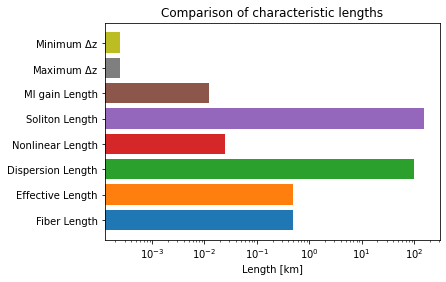

Running SSFM with nsteps = 2048
Finished running SSFM!!!
########### Initializing SSFM!!! ###########
 ### timeFreq Configuration Parameters ###
  Number of points = 16384
  Start time, tmin = -819.200ps
  Stop time, tmax = 819.200ps
  Time resolution, dt = 0.100ps
  
  Start frequency= -5.000THz
  Stop frequency = 4.999THz
  Frequency resolution= 610.314MHz
   
 
Calculating zinfo
Stepmode = (fixed,2048), stepSafetyFactor = 1
 ### Characteristic parameters of simulation: ###
  Length_fiber = 0.5km. Power loss coeff (alpha) = 0.0000 dB/km = 0.0000Np/km 
  L_eff = 0.5000 km
  Length_disp=100.0000km
  Length_NL=0.0249km
  N_soliton=63.4193
  (N_soliton)^2=4022.0114
 
  sign(beta2) = -1.0, so Solitons and Modulation Instability may occur 
   z_soliton = 157.0796
   N_soliton=63.4193
   (N_soliton)^2=4022.0114
 
   Freq. with max MI gain = 142.7436GHz
   Max MI gain = 80.4402/km 
   Min MI distance = 1/gain_MI = Length_NL/2 = 0.0124km 
 


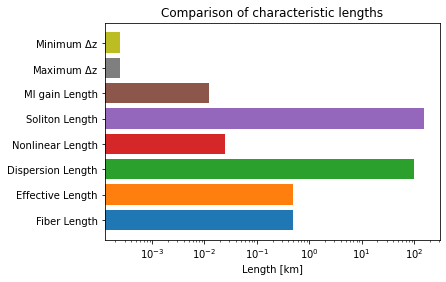

Running SSFM with nsteps = 2048
Finished running SSFM!!!


In [7]:
#https://prefetch.eu/know/concept/optical-wave-breaking/

#Run SSFM
ssfm_result_clean = SSFM(fiber,cleanInputSignal,stepConfig=MI_stepConfig)
ssfm_result_test = SSFM(fiber,testInputSignal,stepConfig=MI_stepConfig)


## Plot results

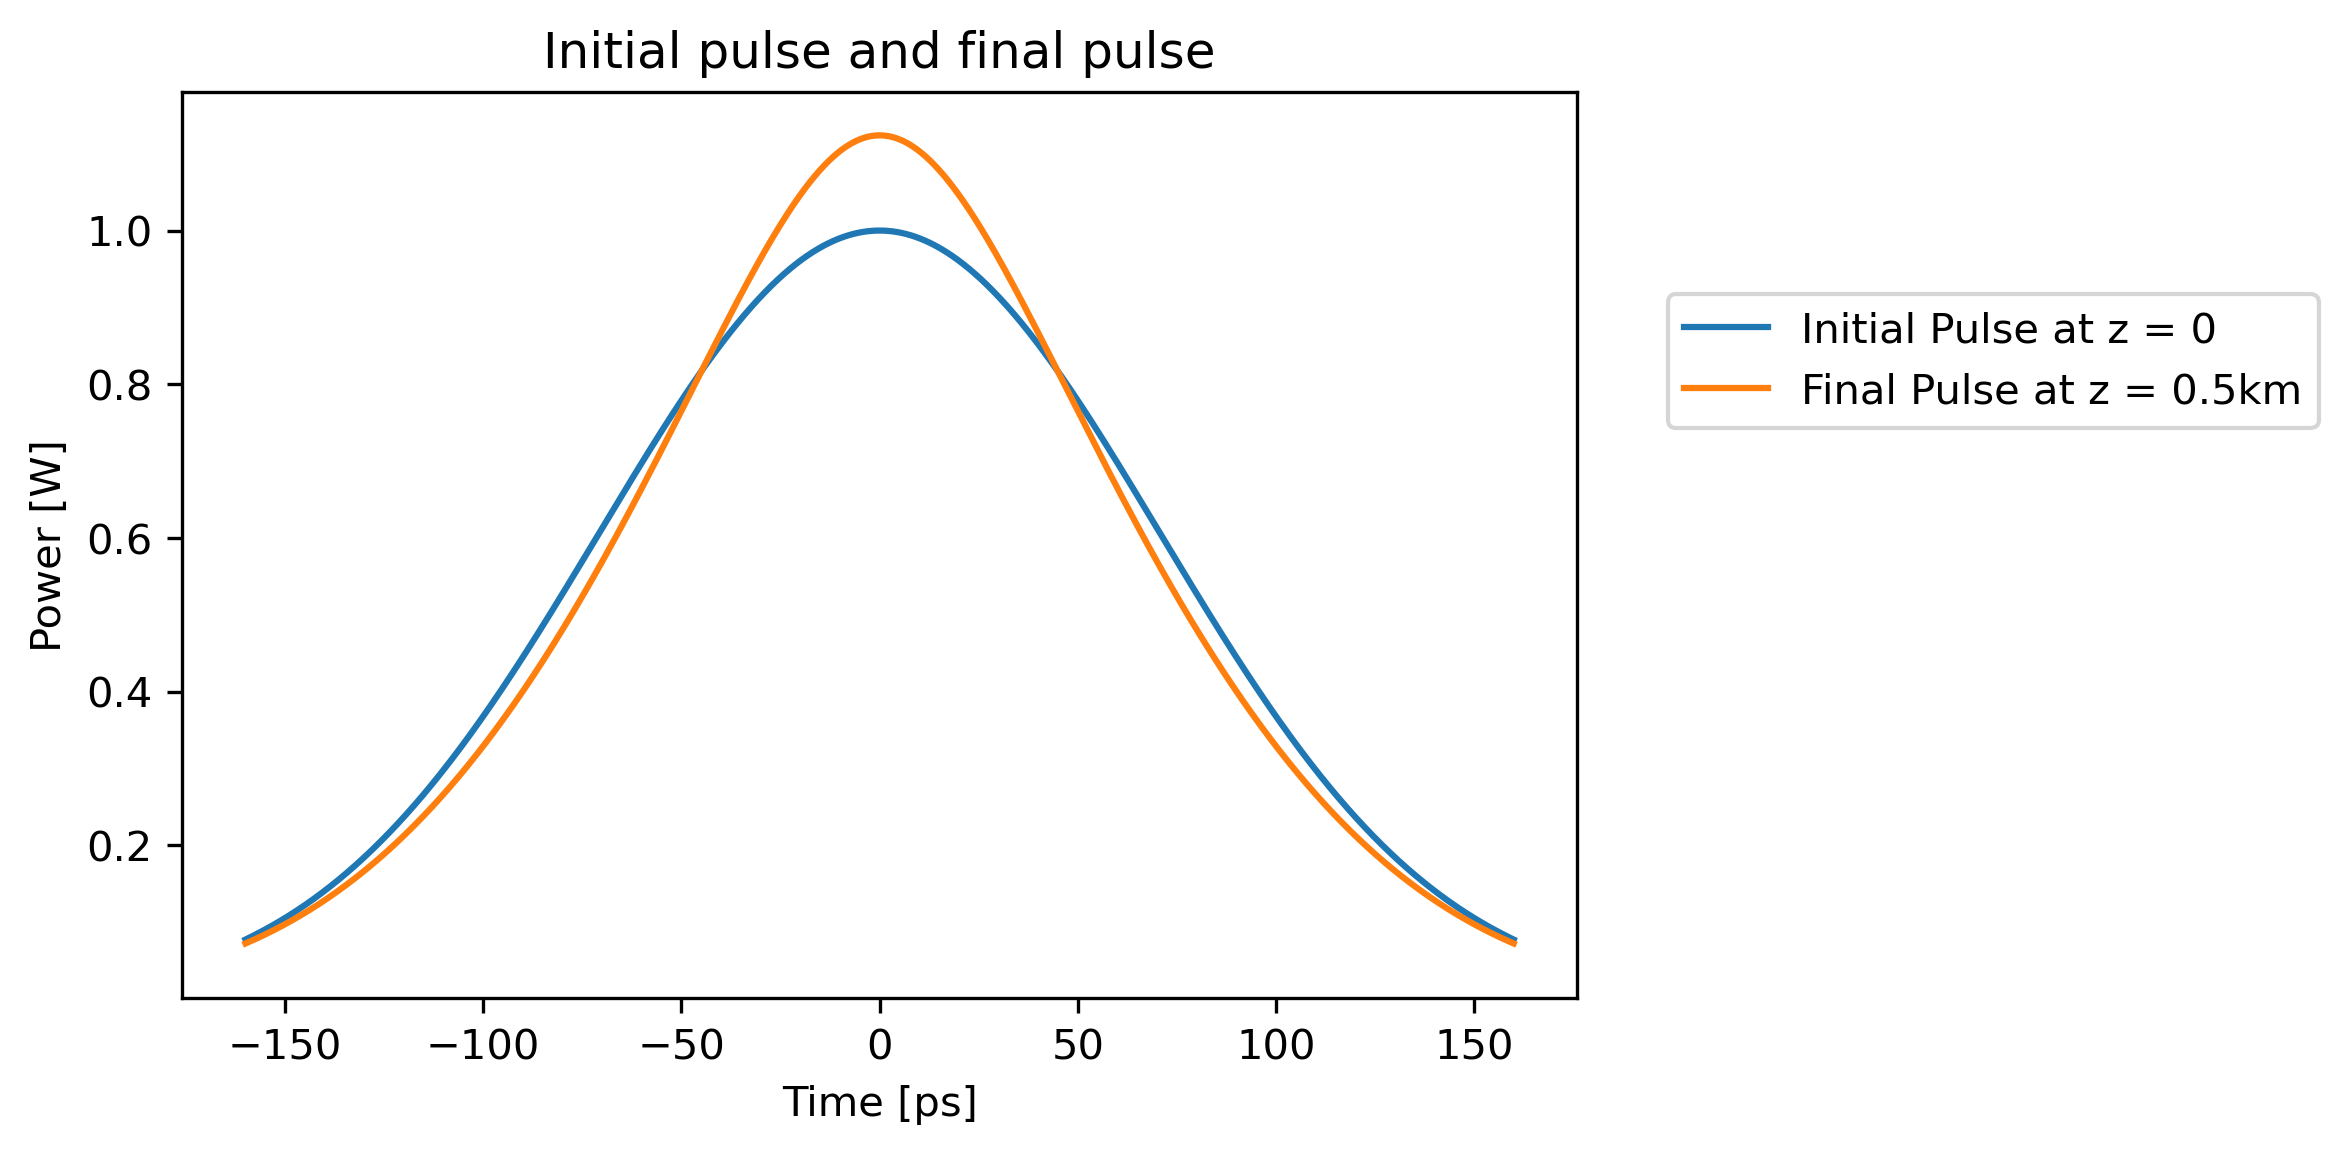

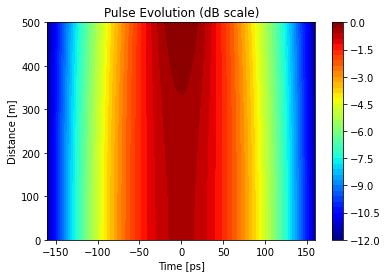

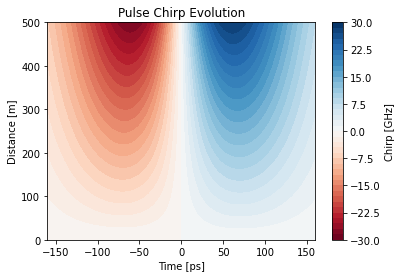

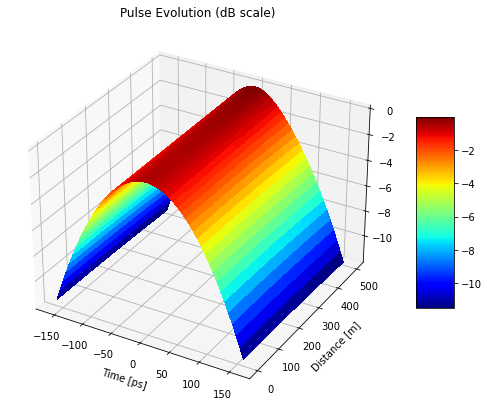

In [8]:
#Plot clean pulses
nrange_pulse=1600
cutoff_pulse=-30
chirpPlotRange_pulse=(-100,100)
plotEverythingAboutPulses(ssfm_result_clean,nrange_pulse,cutoff_pulse,chirpPlotRange=chirpPlotRange_pulse)



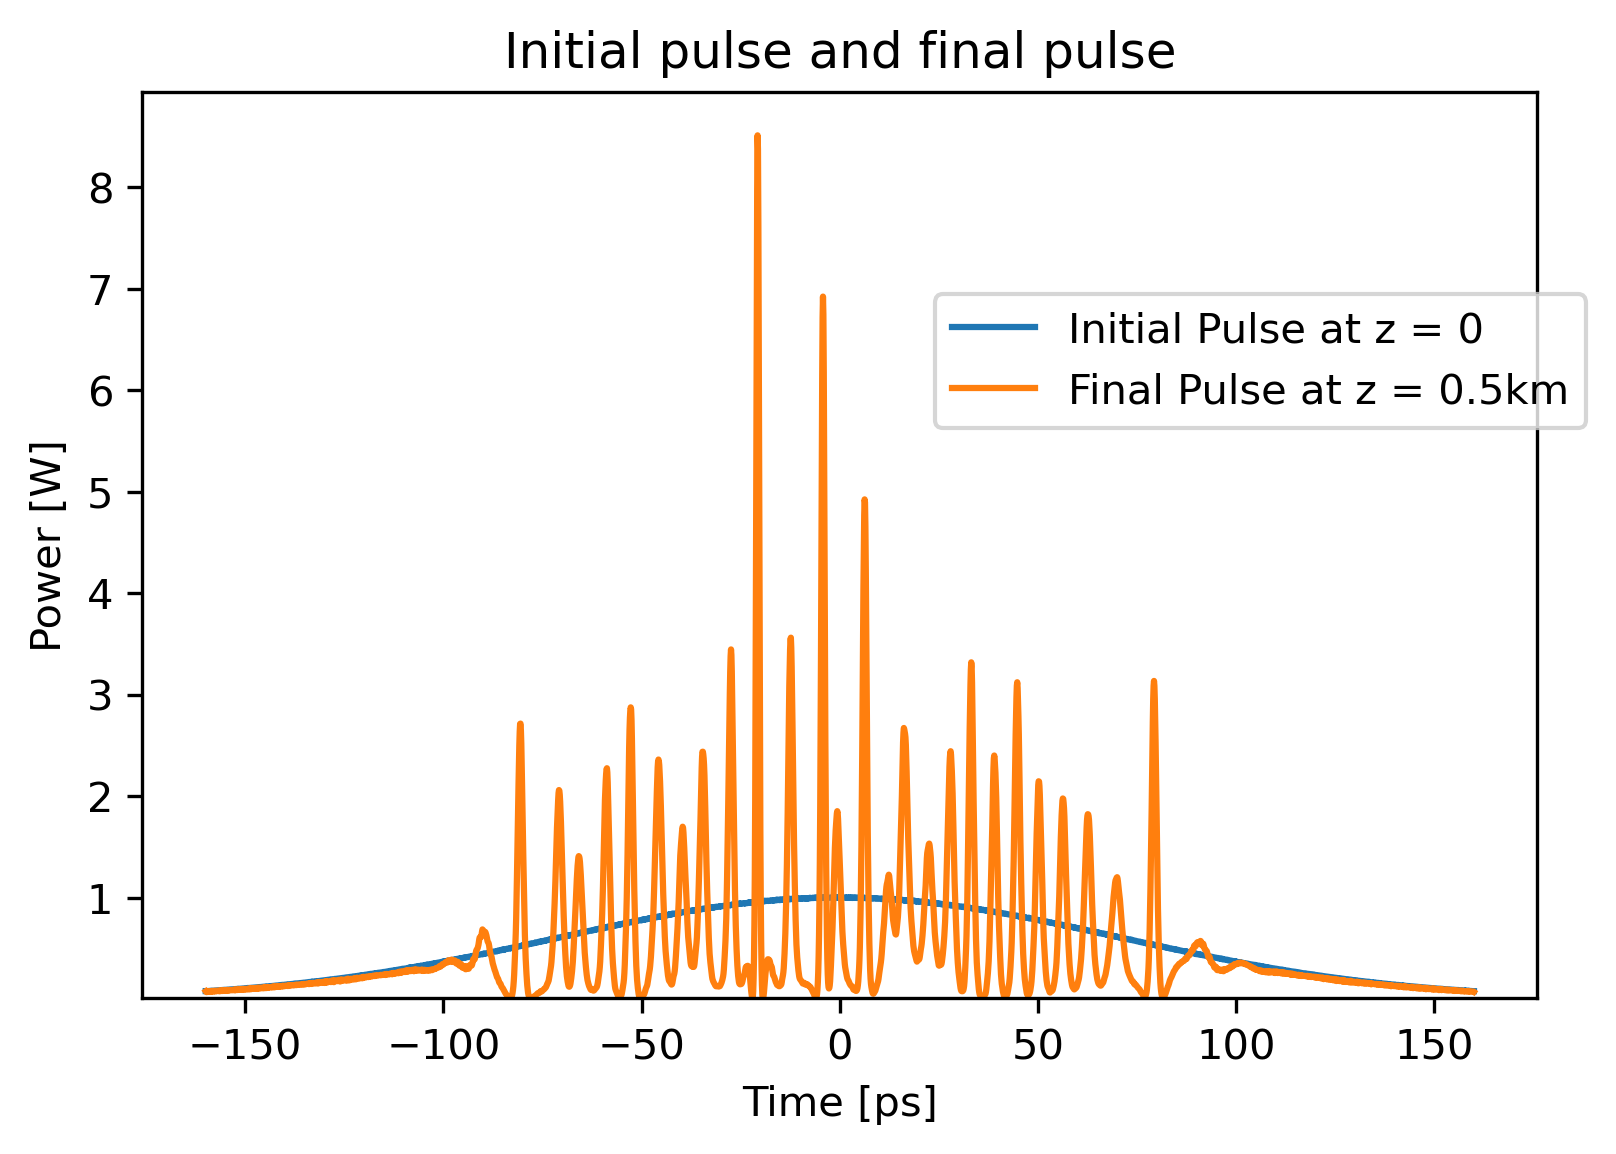

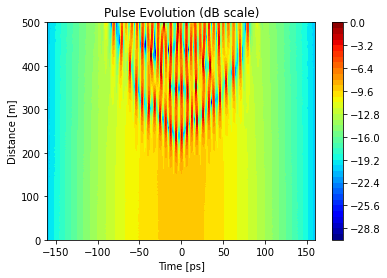

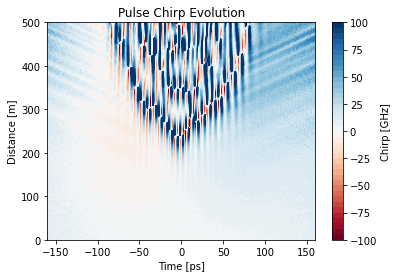

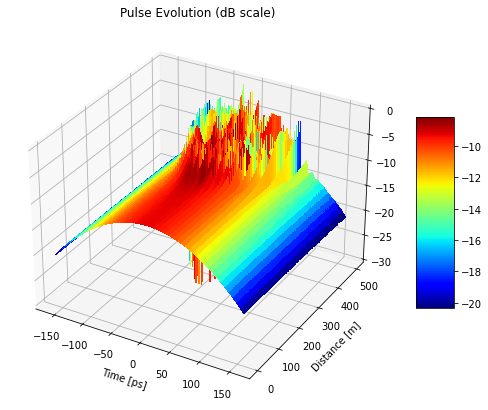

In [9]:
#Plot noisy pulses
plotEverythingAboutPulses(ssfm_result_test,nrange_pulse,cutoff_pulse,chirpPlotRange=chirpPlotRange_pulse,savename="MI")


from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.legend import LineCollection
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

n_min = int(ssfm_result_test.timeFreq.number_of_points/2-nrange_pulse)
n_max = n_min+2*nrange_pulse


ssfm_result_test.timeFreq.t[n_min:n_max]

points = np.array( [ssfm_result_test.timeFreq.t[n_min:n_max]*1e12 ,  getPower(ssfm_result_test.pulseMatrix[ssfm_result_test.n_z_steps,n_min:n_max])   ]  ).T.reshape(-1,1,2)
segments = np.concatenate([points[0:-1],points[1:]],axis=1)

#Make custom colormap
colors = ["red" ,"gray", "blue"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

#Initialize color normalization function
norm = plt.Normalize(-600,600)

#Initialize line collection to be plotted
lc=LineCollection(segments,cmap=cmap1,norm=norm)
lc.set_array( getChirp(ssfm_result_test.timeFreq.t[n_min:n_max],ssfm_result_test.pulseMatrix[ssfm_result_test.n_z_steps,n_min:n_max])/1e9 )

#Initialize figure
fig, ax = plt.subplots(dpi=150)
line = ax.add_collection(lc)
fig.colorbar(line,ax=ax, label = 'Chirp [GHz]')

Pmax_gif = np.max( getPower(ssfm_result_test.pulseMatrix[:,n_min:n_max])  )

#Function for specifying axes
def init():
  

  ax.set_xlim([-50,50])
  ax.set_ylim([0,1.05*Pmax_gif])
  
  ax.set_xlabel('Time [ps]')
  ax.set_ylabel('Power [W]')
#Function for updating the plot in the .gif
def update(i):
  ax.clear() #Clear figure
  init()     #Reset axes
  ax.set_title(f'Optical Wave breaking, z={np.round(ssfm_result_test.zvals[i],1)}m ')
  #Make collection of points from pulse power
  points = np.array( [ssfm_result_test.timeFreq.t*1e12 ,  getPower(ssfm_result_test.pulseMatrix[i,:])   ]  ).T.reshape(-1,1,2)
  
  #Make collection of lines from points
  segments = np.concatenate([points[0:-1],points[1:]],axis=1)
  lc=LineCollection(segments,cmap=cmap1,norm=norm)

  #Activate norm function based on local chirp
  lc.set_array( getChirp(ssfm_result_test.timeFreq.t[n_min:n_max],ssfm_result_test.pulseMatrix[i,n_min:n_max])/1e9 )
  
  #Plot line
  line = ax.add_collection(lc)



#Make animation
ani = FuncAnimation(fig,update,range(ssfm_result_test.n_z_locs),init_func=init)
plt.show()

#Save animation as .gif
framerate=30 # Framerate of 30 will look smooth
writer = PillowWriter(fps=framerate)
ani.save(f'MI_abc_fps={framerate}.gif',writer=writer)